In [5]:
import nidaqmx 
import atiiaftt as ati
import time
import numpy as np
from nidaqmx.stream_readers import AnalogMultiChannelReader
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
CALFILEPATH = "..\FT44764\FT44764.cal"
INDEX = 1

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
    
    readings = task.read()

sampleTT = [0,0,0,0,0,0]

sensor = ati.FTSensor()
cal = sensor.createCalibration(CALFILEPATH, INDEX)
sensor.setForceUnits("N".encode("utf-8"))
sensor.setTorqueUnits("N-m".encode("utf-8"))
sensor.setToolTransform(sampleTT, "mm".encode("utf-8"), "deg".encode("utf-8"))

DURATION = 5

# bias = readings[:6]
# SG_output = readings[:6]
# SG_ref = readings[6:]

# # sensor.bias(bias)
# output = sensor.convertToFt(SG_output)

# print("SG output: ", SG_output)
# print("SG red: ", SG_ref)
# print("Force: ", output)

In [29]:
# current_time = time.time()
# readings_outside_loop = []
# with nidaqmx.Task() as task:
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
#     task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
#     while time.time() < current_time+DURATION:
#         readings_outside_loop.append(sensor.convertToFt(task.read()))

# # output_outside_loop = sensor.convertToFt(readings_outside_loop[0])
# print(len(readings_outside_loop))

200


In [14]:
# current_time = time.time()
# readings_inside_loop = []
# while time.time() < current_time+DURATION:
#     with nidaqmx.Task() as task:
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
#         task.ai_channels.add_ai_voltage_chan("Dev1/ai5")

#         readings_inside_loop.append(task.read())

# # output_inside_loop = sensor.convertToFt(readings_inside_loop[0])
# print(len(readings_inside_loop))

171


In [7]:
readings_multi = []
read_task = nidaqmx.Task()
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
reader = AnalogMultiChannelReader(read_task.in_stream,)
values_read = np.zeros(6, dtype=np.float64)

current_time = time.time()
while time.time() < current_time+DURATION:
    reader.read_one_sample(values_read)
    
    readings_multi.append(sensor.convertToFt(values_read.tolist()))

print(len(readings_multi))

204


In [12]:
FOLDER_DIR = "..\Joey\Record_Data"

demo_df = pd.read_csv(FOLDER_DIR+"\Demo\Sensor_2.csv")
demo_df.drop(['Frequency = 1000',
       'Averaging Level = 16', 'F/T Serial Number = FT44764',
       'Time Started = 28-Jun-23 6:15:14 PM'], axis=1, inplace=True)
demo_df
# plt.plot(range(len(readings_outside_loop)), [sample[0] for sample in readings_outside_loop])
# plt.plot(range(len(readings_outside_loop)), [sample[1] for sample in readings_outside_loop])
# plt.plot(range(len(readings_outside_loop)), [sample[2] for sample in readings_outside_loop])
# plt.plot(range(len(readings_multi)), [sample[0] for sample in readings_multi])
# plt.plot(range(len(readings_multi)), [sample[1] for sample in readings_multi])
# plt.plot(range(len(readings_multi)), [sample[2] for sample in readings_multi])

,Force X (N),Force Y (N),Force Z (N),Torque X (N-m),Torque Y (N-m),Torque Z (N-m)
0,-0.002098,0.004441,0.021651,0.000369,-0.000110,0.000330
1,-0.000252,0.001055,0.018955,0.000279,0.000016,0.000091
2,-0.002863,0.003235,0.015471,0.000294,0.000003,0.000209
3,-0.002023,0.003415,0.018059,0.000267,-0.000076,0.000273
4,-0.001906,0.001996,0.012922,0.000101,0.000162,0.000223
...,...,...,...,...,...,...
307,-0.002577,0.003466,-0.005160,0.000146,0.000244,-0.000188
308,-0.001857,0.004025,0.005193,0.000169,0.000036,0.000087
309,-0.000569,0.001297,-0.000527,0.000030,0.000169,-0.000063
310,-0.001766,0.003307,0.001090,0.000041,0.000155,0.000020


ValueError: 'andys code' is not a valid format string (unrecognized character 'a')

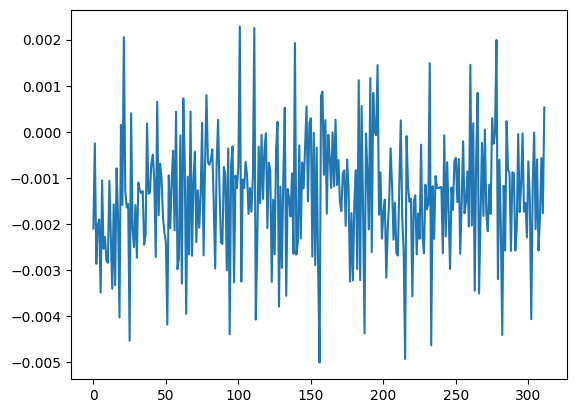

In [16]:
plt.plot(demo_df.index,demo_df["Force X (N)"], label="demo")
plt.plot(range(len(readings_multi)), [sample[0] for sample in readings_multi], "andy's code")